In [3]:
!pip install opencv-python


In [4]:
import cv2

In [5]:
import matplotlib.pyplot as plt 

In [6]:
import numpy as np


In [9]:
# resmi içeri aktarma
img = cv2.imread("barcelona.jpg",0) # siyah beyaz : 0

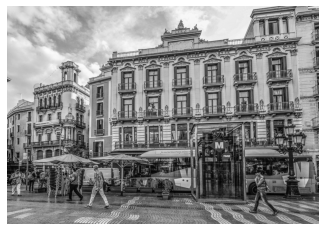

In [11]:
plt.figure(), plt.imshow(img,cmap = "gray"),plt.axis("off");

##kenarları tespit etme

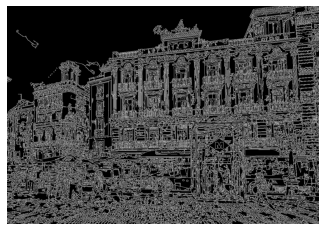

In [14]:
edges = cv2.Canny(image = img,threshold1 = 0, threshold2 = 255) # default değerler
plt.figure(), plt.imshow(edges,cmap = "gray"),plt.axis("off");

In [ ]:
# fotograflarımızda binaların vs kenarlarını buldu  ancak su vs. oldgunda buraları almamasını istiyorum
# bunun için threshold değerleri ile oynayabilir ya da 
# DA' de yapmış oldugumuz gibi median-mean değerleri ile doldurabilirim

In [15]:
med_val = np.median(img) 

In [16]:
med_val

141.0

In [17]:
mean_val = np.mean(img) 

In [18]:
mean_val

131.90959084871363

mean ve median birbirlerine yakın oldugu için alt ve üst threshold değerlerini belirleyebilirim
bunun için :

In [31]:
low = int(max(0,(1-0.33)*med_val)) # yüzde 67 sini aldım
high = int(min(255,(1+0.33)*med_val)) # yüzade 33ünü aldım


In [33]:
low,high

(94, 187)

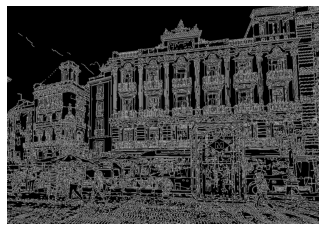

In [34]:
edges = cv2.Canny(image = img,threshold1 = low, threshold2 = high) 
plt.figure(), plt.imshow(edges,cmap = "gray"),plt.axis("off");

blur

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1279.5, 893.5, -0.5))

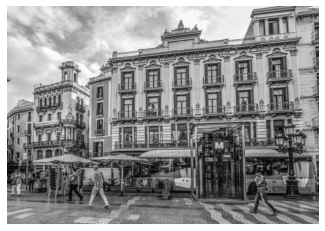

In [35]:
blurred_img = cv2.blur(img, ksize = (3,3))
plt.figure(), plt.imshow(blurred_img, cmap = "gray"),plt.axis('off')

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1279.5, 893.5, -0.5))

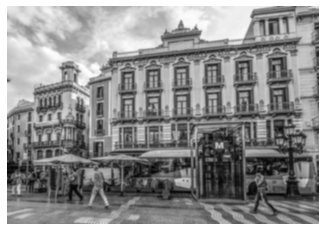

In [36]:
blurred_img = cv2.blur(img, ksize = (8,8))
plt.figure(), plt.imshow(blurred_img, cmap = "gray"),plt.axis('off')
# biraz daha bulanıklaştı

In [38]:
med_val = np.median(blurred_img)
med_val # median değerim azalmış

131.0

In [40]:
mean_val = np.mean(blurred_img) 
mean_val

131.98865964065996

In [42]:
low = int(max(0,(1-0.33)*med_val)) # yüzde 67 sini aldım
high = int(min(255,(1+0.33)*med_val)) # yüzde 33ünü aldım


In [43]:
low,high  # kanarlar biraz daha belirginleşti

(87, 174)

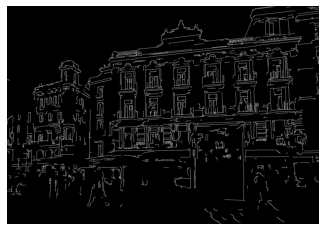

In [48]:
edges = cv2.Canny(image = blurred_img, threshold1 = low, threshold2 = high) 
plt.figure(), plt.imshow(edges,cmap = "gray"),plt.axis("off");

GÖRÜLDÜĞÜ ÜZERE RESİMDEKİ DETAYLARI OLDUKÇA AZALTTI

KSIZE DEĞERLERİM İLE OYNAYARAK BLURLANMIŞ FOTOGRAFLARDA KENAR TESPİTİNİ DAHA MÜMKÜN KILABİLİRİZ.